### Imports

#### Libraries

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time

from sklearn.decomposition import PCA

from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

#### Files

In [2]:
file = 'C:/Archives/PyData/Datasets/mnist/train.csv'

df = pd.read_csv(file)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = df['label'].copy()
X = df.drop('label', axis = 1).copy()

### Visualizations

#### Individual Instance

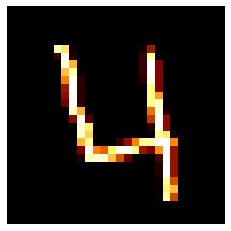

In [12]:
digit = X.iloc[3].as_matrix().reshape(28,28)
plt.imshow(digit, interpolation = 'none', cmap = 'afmhot')
plt.axis('off')
plt.show()

#### Dataset

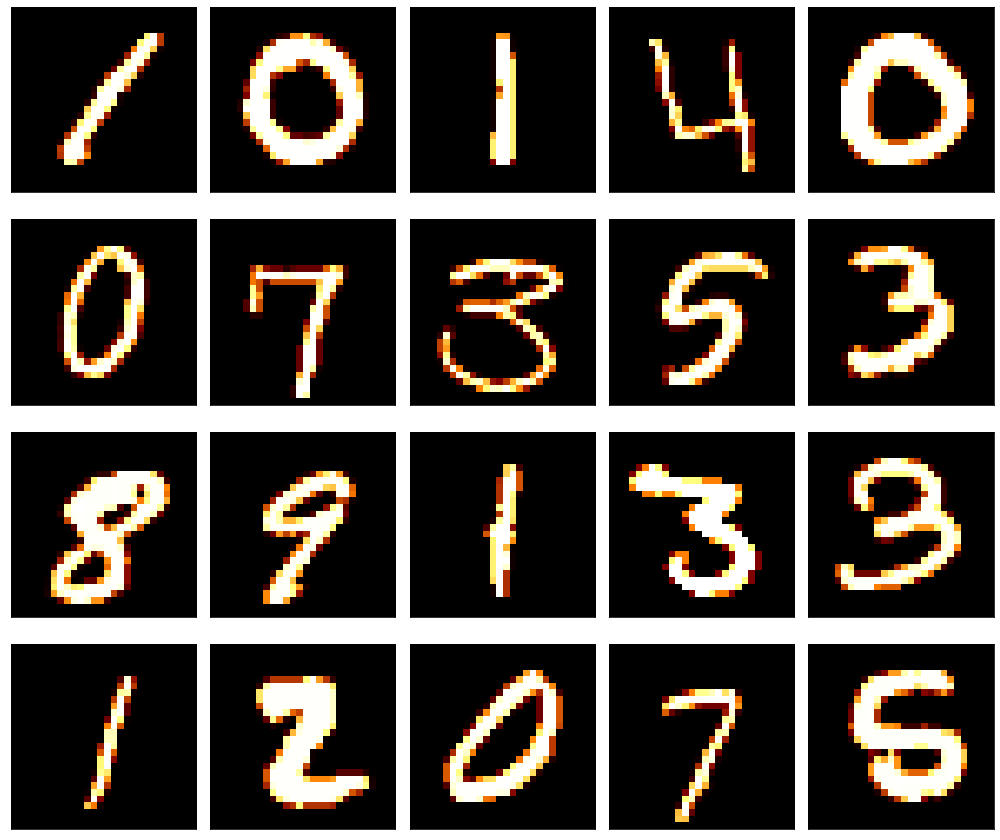

In [13]:
plt.figure(figsize=(14,12))
for digit_num in range(0,20):
    plt.subplot(4,5,digit_num+1)
    grid_data = X.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.axis('off')
plt.tight_layout()

### Principal Component Analysis

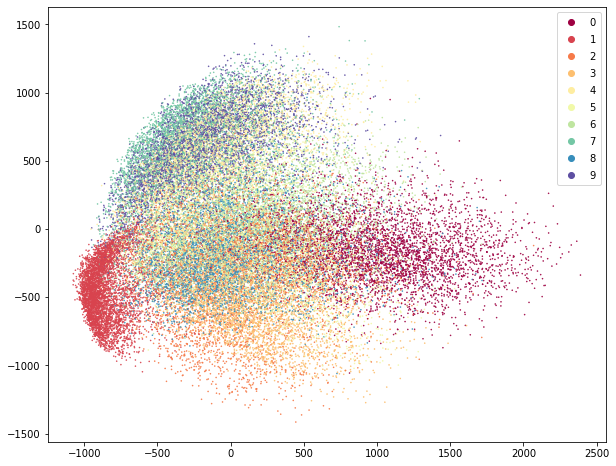

In [5]:
# PCA on X (training set) 

start = time.time()

pca = PCA(n_components = 2)
X_centered = X - X.mean(axis = 0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

plt.figure(figsize = (10,8))

scatter = plt.scatter(x = X_pca[:,0], y = X_pca[:,1],s = 0.3, c = y, cmap = plt.cm.Spectral, alpha = 1)
legend = plt.legend(*scatter.legend_elements())
plt.show()

print('Time elapsed: ' + str(time.time()-start))

#### Multi Dimensional Scaling

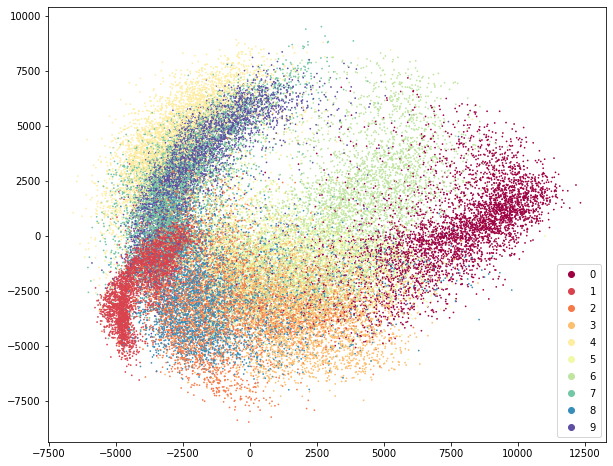

In [13]:
mds = MDS(n_components = 2)
X_centered = X - X.mean(axis = 0)
X_mds = mds.fit_transform(X_centered)

plt.figure(figsize = (10,8))

scatter = plt.scatter(x = X_mds[:,0], y = X_mds[:,1],s = 0.5, c = y, cmap = plt.cm.Spectral, alpha = 1)
legend = plt.legend(*scatter.legend_elements())
plt.show()

#### Locally Linear Embedding

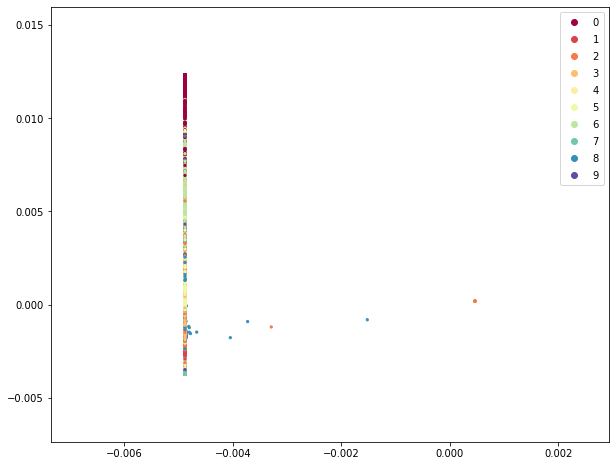

Time elapsed: 3381.7573840618134


In [12]:
start = time.time()

lle = LocallyLinearEmbedding(n_components = 2)
X_centered = X - X.mean(axis = 0)
X_lle = lle.fit_transform(X)

plt.figure(figsize = (10,8))

scatter = plt.scatter(x = X_lle[:,0], y = X_lle[:,1],s = 5, c = y, cmap = plt.cm.Spectral, alpha = 1)
legend = plt.legend(*scatter.legend_elements())
plt.show()

print('Time elapsed: ' + str(time.time()-start))

#### t-SNE

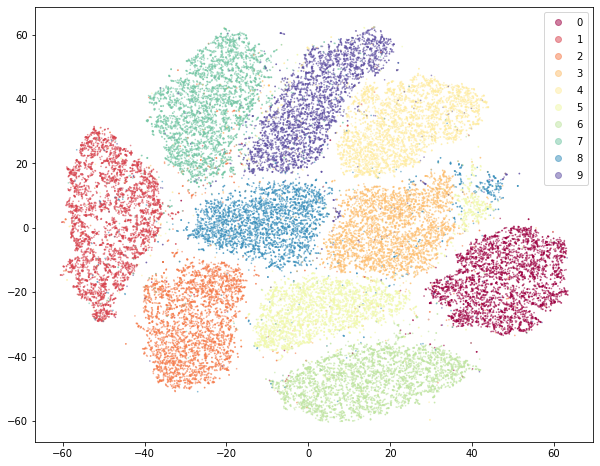

Time elapsed: 3110.43319606781


In [10]:
start = time.time()

tsne = TSNE(n_components = 2)
X_centered = X - X.mean(axis = 0)
X_tsne = tsne.fit_transform(X_centered)
plt.figure(figsize = (10,8))

scatter = plt.scatter(x = X_tsne[:,0], y = X_tsne[:,1],s = 0.5, c = y,cmap = plt.cm.Spectral, alpha = 0.5)
legend = plt.legend(*scatter.legend_elements())
plt.show()

print('Time elapsed: ' + str(time.time()-start))